In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [2]:
rawData = pd.read_csv('C:\\Users\\MMM-SM\\21Pypractice\\playtennis.csv')
rawData

,outlook,temperature,humidity,wind,play tennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [3]:
rawData.rename({'play tennis':'play_tennis'},axis = 1,inplace=True)
rawData

,outlook,temperature,humidity,wind,play_tennis
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [4]:
Data = rawData.copy(deep=True)

In [5]:
rawData['outlook'] = rawData.outlook.map({'sunny':1,'overcast':2,'rain':3})
rawData.head(3)

,outlook,temperature,humidity,wind,play_tennis
0,1,hot,high,weak,no
1,1,hot,high,strong,no
2,2,hot,high,weak,yes


In [6]:
rawData['temperature'] = rawData.temperature.map({'hot':1,'mild':2,'cool':3})
rawData.head()

,outlook,temperature,humidity,wind,play_tennis
0,1,1,high,weak,no
1,1,1,high,strong,no
2,2,1,high,weak,yes
3,3,2,high,weak,yes
4,3,3,normal,weak,yes


In [7]:
rawData['humidity'] = rawData.humidity.map({'high':1,'normal':2})
rawData['wind'] = rawData.wind.map({'strong':1,'weak':2})
rawData['play_tennis'] = rawData.play_tennis.map({'yes':1,'no':2})
rawData

,outlook,temperature,humidity,wind,play_tennis
0,1,1,1,2,2
1,1,1,1,1,2
2,2,1,1,2,1
3,3,2,1,2,1
4,3,3,2,2,1
5,3,3,2,1,2
6,2,3,2,1,1
7,1,2,1,2,2
8,1,3,2,2,1
9,3,2,2,2,1


In [8]:
X = rawData.drop('play_tennis',axis=1)
X

,outlook,temperature,humidity,wind
0,1,1,1,2
1,1,1,1,1
2,2,1,1,2
3,3,2,1,2
4,3,3,2,2
5,3,3,2,1
6,2,3,2,1
7,1,2,1,2
8,1,3,2,2
9,3,2,2,2


In [9]:
y = rawData.play_tennis
y

0     2
1     2
2     1
3     1
4     1
5     2
6     1
7     2
8     1
9     1
10    1
11    1
12    1
13    2
Name: play_tennis, dtype: int64

In [10]:
dt = DecisionTreeClassifier(criterion='entropy',
                            splitter='best',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features=None,
                            random_state=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            class_weight=None,
                            presort='deprecated',
                            ccp_alpha=0.0,)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [11]:
dt.predict(X)

array([2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2], dtype=int64)

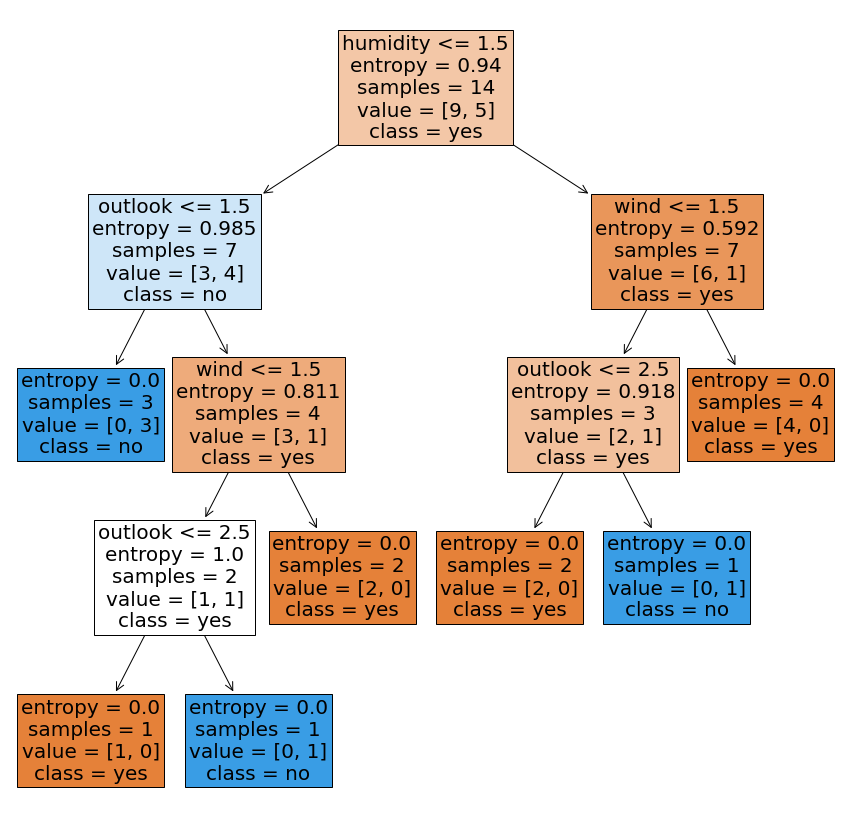

In [12]:
plt.figure(figsize=(15,15))
plot_tree(dt,max_depth=None,
    feature_names=rawData.columns[:-1],
    class_names=['yes','no'],
    label='all',
    filled=True,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate='deprecated',
    rounded=False,
    precision=3,
    ax=None,
    fontsize=20,)
plt.show()

In [13]:
# RX = Data.drop('play_tennis',axis=1)
# ry = Data.play_tennis

In [14]:
dt1 = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,)

In [15]:
dt1.fit(X,y)

DecisionTreeClassifier()

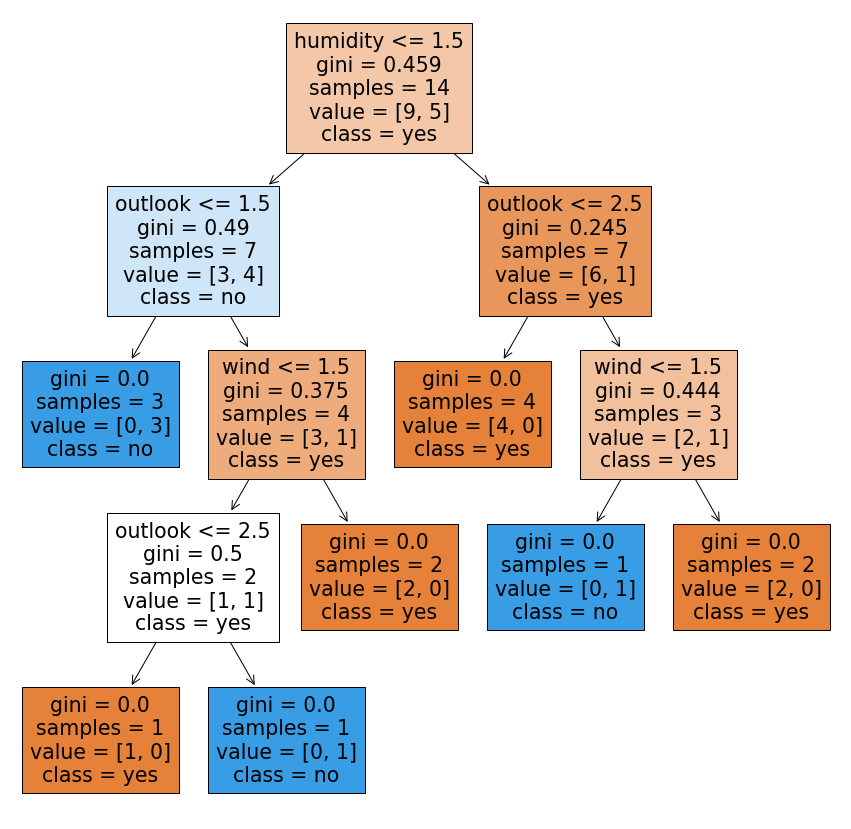

In [16]:
plt.figure(figsize=(15,15))
plot_tree(dt1,max_depth=None,
            feature_names=rawData.columns,
            class_names=['yes','no'],
            label='all',
            filled=True,
            impurity=True,
            node_ids=False,
            proportion=False,
            rotate='deprecated',
            rounded=False,
            precision=3,
            ax=None,
            fontsize=None,)
plt.show()

|descri|Split on outlok Entropy|split on humidity Entropy|
|----|------|---------|
|Entropy before split|0.940285959	|
|	|if outlook == overcast|	if humidity == high|
|	|0|	0.985228136|
|	|if outlook != overcast|	if humidity != high|
|	|1|	0.591672779|
|simple avg|	0.5	|0.788450457|
|weight avg|	0.357142857|	0.25|
|Information gain|	0.583143102|	**0.690285959**|
		